## Problem Set 3: Neural Networks

### Overview
In this problem set, you'll explore the foundational concepts of neural networks, covering basic architecture, activation functions, forward propagation, regularization, and adaptive learning. You'll also complete coding exercises to implement neural network components and train a basic neural network. You will both complete this Python script (`ps3.ipynb`) and submit a LaTeX report (`ps3.tex` and `ps3.pdf`).

## 1. Basic Architecture of a Neural Network

A neural network is composed of layers of neurons: input layer, hidden layer(s), and an output layer. Each neuron receives inputs, processes them, and passes the result to the next layer.

In this section, you'll implement a basic 3-layer neural network structure.

In [3]:
import numpy as np

# Define the structure of the neural network
input_size = 4   # Number of input neurons
hidden_size = 5  # Number of hidden neurons
output_size = 3  # Number of output neurons

# Initialize weights
W1 = np.random.randn(input_size, hidden_size)
W2 = np.random.randn(hidden_size, output_size)
b1 = np.zeros((1, hidden_size))
b2 = np.zeros((1, output_size))

# Neural network architecture
def neural_network(X):
    hidden_layer = np.dot(X, W1) + b1
    activated_hidden = np.maximum(0, hidden_layer)  # Using ReLU for activation
    output_layer = np.dot(activated_hidden, W2) + b2
    return output_layer


## 2. Activation Functions


Activation functions introduce non-linearity into the network, allowing it to learn more complex patterns. Common functions include:

- **Sigmoid**: S-shaped curve, useful for binary classifications.
- **ReLU (Rectified Linear Unit)**: Outputs zero if input is negative, otherwise outputs the input.
- **Leaky ReLU**: Similar to ReLU but with a small gradient for negative inputs.

### Exercise:
Write functions for each activation function and plot them over a range of inputs.


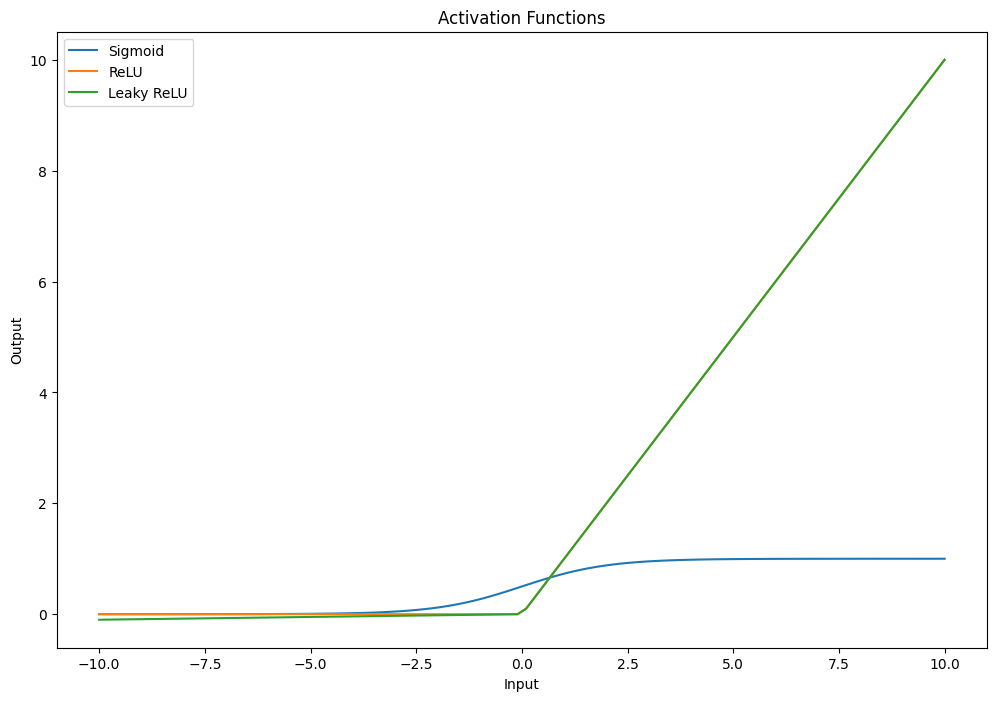

In [4]:
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

# Plotting
x = np.linspace(-10, 10, 100)
plt.figure(figsize=(12, 8))
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, relu(x), label='ReLU')
plt.plot(x, leaky_relu(x), label='Leaky ReLU')
plt.title("Activation Functions")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.show()


## 3. Forward Propagation

Forward propagation is the process of passing inputs through the network to generate an output.

### Exercise:
Implement forward propagation for a 3-layer neural network.

In [5]:
def forward_propagation(X):
    # First layer
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    
    # Second layer
    Z2 = np.dot(A1, W2) + b2
    output = sigmoid(Z2)  # Assuming binary classification
    
    return output


## 4. Overfitting and Regularization

Overfitting occurs when a model learns the noise in the training data rather than the actual pattern. Regularization helps control this.

Common techniques include:

- **L2 Regularization**: Adds a penalty based on the sum of squared weights.
- **Dropout**: Randomly ignores some neurons during training.

### Exercise:
Implement L2 regularization in the loss calculation.

In [6]:
def compute_loss_with_regularization(y_true, y_pred, weights, lambda_reg):
    m = y_true.shape[0]
    data_loss = -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / m
    reg_loss = (lambda_reg / (2 * m)) * np.sum([np.sum(w**2) for w in weights])
    return data_loss + reg_loss


## 5. Training a Neural Network

Training involves adjusting the weights and biases to minimize the loss. A popular method is gradient descent.

### Exercise:
Implement a simple gradient descent loop to train the neural network.

In [7]:
def gradient_descent(X, y, iterations, learning_rate):
    for i in range(iterations):
        # Forward pass
        output = forward_propagation(X)
        
        # Compute gradients (this is a simplified derivative for demonstration)
        dW2 = np.dot(W1.T, (output - y) * output * (1 - output))
        db2 = np.sum((output - y) * output * (1 - output), axis=0)
        
        # Update weights
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        if i % 100 == 0:
            print(f"Iteration {i}: Loss {compute_loss_with_regularization(y, output, [W1, W2], lambda_reg=0.01)}")



## 6. Adaptive Learning Rates


Adaptive learning rate methods, like Adam, adjust the learning rate based on past gradients, improving training stability.

### Exercise:
Implement a simple version of the Adam optimizer for gradient descent.

In [8]:
def adam_optimizer(W, dW, m, v, t, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m = beta1 * m + (1 - beta1) * dW
    mt = m / (1 - beta1**t)
    v = beta2 * v + (1 - beta2) * (dW**2)
    vt = v / (1 - beta2**t)
    W_update = learning_rate * mt / (np.sqrt(vt) + epsilon)
    W -= W_update
    return W, m, v
